## Building the graph

### Antoher context: Our hypothesis corroborates in a Reddit comments scope?

After getting and parsing the data, we need to understand and create metrics that could lead us to our hypothesis and it's impacts.

The data for this analysis can be obtained [here](https://www.kaggle.com/datasets/ehallmar/reddit-comment-score-prediction?select=comments_negative.csv).

In [2]:
from netpixi.integration.gt import Graph
import pandas as pd
import numpy as np

g = Graph(directed=False)

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


For this analysis we don't care if the comment is considered positive or negative, we'll drop the data relationed to it, and get only the author and subreddit_id columns.

In [3]:
data1 = pd.read_csv("archive/comments_negative.csv")
data2 = pd.read_csv("archive/comments_positive.csv")

In [4]:
data = pd.concat([data1, data2])
print(f"lines: {data.shape[0]}")

lines: 4000000


In [5]:
data = data.drop(["parent_id","score","controversiality","parent_link_id","parent_text",
                  "parent_score","parent_ups","parent_author","parent_controversiality"],axis=1)
data = data.sample(frac=0.005, random_state=42) #only 0.5% of the data(much data available)
print(f"lines: {data.shape[0]}")

lines: 20000


In [6]:
#Looking to the total contribuitions for the users in the source repositories
total_contributions = data.groupby(['author']).count()['subreddit_id'].sort_values(ascending=False)
total_contributions

author
[deleted]              2311
andrewsmith1986          16
Apostolate               14
WarPhalange              12
hitlersshit              10
                       ... 
Repeats_You               1
Repentia                  1
Reptilian_Overlords       1
Repyro                    1
zzzzcharliezzzz           1
Name: subreddit_id, Length: 16213, dtype: int64

There are so many "authors" who deleted it's comments, we're going to remove this references.

In [7]:
data = data[data['author'] != '[deleted]']

In [8]:
#Looking to the total contribuitions for the users in the source repositories
total_contributions = data.groupby(['author']).count()['subreddit_id'].sort_values(ascending=False)
total_contributions

author
andrewsmith1986        16
Apostolate             14
WarPhalange            12
hitlersshit            10
NoMoreNicksLeft         9
                       ..
Repeats_You             1
Repentia                1
Reptilian_Overlords     1
Repyro                  1
zzzzcharliezzzz         1
Name: subreddit_id, Length: 16212, dtype: int64

In [9]:
# As we can see there are many contribuitors who participated much less than the average, we're going to use this to filter 
# the data: contribuitors who has less contributions than the average will not be considered for the network
total_contributions.describe()

count    16212.000000
mean         1.091105
std          0.441818
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: subreddit_id, dtype: float64

In [10]:
#Cleaning the data as explaneid above
users = data.groupby(['subreddit_id']).count()['author'].sort_values(ascending=False)
users_mean = users.mean()
subrredit_edge = users[users>users_mean]
subrredit_edge.index

Index(['t5_2qh1i', 't5_2qh33', 't5_2qh0u', 't5_2qh61', 't5_2qh03', 't5_2qzb6',
       't5_2cneq', 't5_2qh1e', 't5_2qh13', 't5_6', 't5_2rfxx', 't5_2qqjc',
       't5_2s7tt', 't5_2qh2p', 't5_2qmg3', 't5_2qqlo', 't5_2qi58', 't5_2qh16',
       't5_2qpp6', 't5_2qh3s', 't5_2qo4s', 't5_mouw', 't5_2qh3l', 't5_2ss5b',
       't5_2fwo', 't5_2s580', 't5_2qh1o', 't5_2r9vp', 't5_2r05i', 't5_2qhwp',
       't5_2qt55', 't5_2qh3p', 't5_2qjvn', 't5_2r2jt', 't5_2qh1u', 't5_2qiel',
       't5_2qhx4', 't5_2sljg', 't5_2qh4w', 't5_2sokh', 't5_2sokd', 't5_2rh4c',
       't5_2qlqh', 't5_2sgp1', 't5_2qmeb', 't5_2qhj4', 't5_2qh3v', 't5_2qka0',
       't5_2qm9d', 't5_2qh68', 't5_33x33', 't5_2qhk3', 't5_2qm4e', 't5_2qhc8',
       't5_2qore', 't5_2s837', 't5_2sqho', 't5_2r9po', 't5_2qn5f', 't5_2to41',
       't5_2qh0s', 't5_2qh11', 't5_2ti4h', 't5_2qnts', 't5_2w31t', 't5_2qh4r',
       't5_2qio8', 't5_2vizz', 't5_2qiep', 't5_2qhqb', 't5_2qyt6', 't5_2sekm',
       't5_2qpol', 't5_2qh72', 't5_2qgzy', 't5_2s30g', 't5

In [11]:
#filtering
data_clean = data[data['subreddit_id'].isin(subrredit_edge.index)]

In [12]:
data_clean

,id,subreddit_id,link_id,text,ups,author
1049554,c6336h1,t5_2qh0u,t3_zb1t0,I was giving him advice and he just kind of sa...,-10,WarPhalange
214510,c5qauwy,t5_2qhwp,t3_xvrfy,"It's not really counter-strike, though.\n\nedi...",-24,sncho
145764,coeek0n,t5_2qzb6,t3_2v48qp,I was in 7th grade on 9/11 and had 1 teacher w...,474,OrgasmickJagger
198867,c3xbp2o,t5_2qh3s,t3_qfwmk,"And said, ""you're going with the jedi up to wh...",386,agoyalwm
1184366,cnelpma,t5_2qh33,t3_2rbu7f,i lelz,-9,mudcove
...,...,...,...,...,...,...
826638,c3ur6lf,t5_2qh1i,t3_q4ebb,I think you forgot a word. Why does everyone ...,-12,closetoctopussshaver
1104333,c57qjxz,t5_2qh33,t3_vudi0,"Also, you can have long hair and not be gay. B...",107,beccaonice
301442,c5yt17a,t5_2qh61,t3_ytzqf,Any more of these puns and they'll have to cha...,-20,awkward_person_here
168763,c4oazab,t5_2qh1i,t3_to521,"Rather than about the effort, it's about the a...",431,bluepepper


We already have the filter to build the network with a good context to define an edge between two users: 

**There are an edge between them if they have at least one comment in a relevant Subreddit in common**

Even so, there many users who comment very little, and we need to adjust our data to maintain only users with a appropriate average frequency in mass of data to avoid any bias due users with less interactions than the average of comments.

In [13]:
#Contributions to define an edge
edge_contrib = data_clean.groupby(['author']).count()['subreddit_id'].sort_values(ascending=False)
#Average contributions
average_contrib =edge_contrib.mean()
#Filtering
above_average_contrib = edge_contrib[edge_contrib>average_contrib]
data_clean = data_clean[data_clean['author'].isin(above_average_contrib.index)]
authors = data_clean.groupby(['author']).count()['subreddit_id'].sort_values(ascending=False)
data_clean

,id,subreddit_id,link_id,text,ups,author
1049554,c6336h1,t5_2qh0u,t3_zb1t0,I was giving him advice and he just kind of sa...,-10,WarPhalange
214510,c5qauwy,t5_2qhwp,t3_xvrfy,"It's not really counter-strike, though.\n\nedi...",-24,sncho
1698121,codggas,t5_2vizz,t3_2v03b2,It's so cool he put it twice!,-7,F7U24
475806,c04esg1,t5_mouw,t3_6nz1k,"If you can't, don't feel badly about yourself....",207,codepoet
485734,c4lg7he,t5_2qh1i,t3_tc8x2,Cain &amp; Abel.,204,__circle
...,...,...,...,...,...,...
446656,c0c5zs7,t5_2qzb6,t3_9bsir,Looks like you didn't learn much from your acc...,-16,A_for_Anonymous
1577967,c5xi3li,t5_2qh1e,t3_yojmq,Literally literally or figuratively literally?,80,PirateLordBush
452843,c05q70p,t5_2fwo,t3_75fn4,Why were you modded down?,-16,malcontent
176133,colx9ej,t5_2qqjc,t3_2vxp03,http://i.imgur.com/vB9B5.gif\n,419,VelvetHorse


## Defining focus

We now need to define a custom metric to help to define our hypothesis: 

**As much a users belong to a community (obtained by cluster coefficient metric), he has focus in the comments**

That way we need to define the concept of focus. Focus will be understanding in this context by: 

*Number of user comments considered for edge formation divided per total comments in the data, thoughtful by the Number of user comments per the max Number of comment of an individual:*

 $$focus = \frac{edgeComments_i}{totalComments_i}\cdot\frac{edgeComments_i}{maxEdgeComments}$$
 
 This metric is interesting because as define the percentage of relevant contributions to the graph, it takes into account the quantity of the individual contributions of the user, giving different weights to them, even the  percentage of relevant comment is similar, deepening the relevance of this metric.

In [14]:
focus = (edge_contrib/total_contributions)*(edge_contrib/np.max(edge_contrib))
focus = focus.dropna().sort_values(ascending=True)
focus

author
slyder565          0.017857
Hard_Bodied_Man    0.017857
RobotAnna          0.017857
swefpelego2        0.023810
Mustaka            0.023810
                     ...   
Ragnalypse         0.642857
arrowstotheknee    0.642857
WarPhalange        0.857143
andrewsmith1986    0.875000
Apostolate         1.000000
Name: subreddit_id, Length: 14023, dtype: float64

## Building the Network properly

To the define the network we need to enumerate the collaborators who interact in the same repo by repo, and after it set pairs of developers to create an edge in the network. 

Concurrently we are defining the focus of each developer.

In [15]:
same_repo_colab = data_clean.groupby('subreddit_id')['author'].apply(lambda x: list(np.unique(x)))
same_repo_colab

subreddit_id
t5_2cneq    [A_Nihilist, AnnArchist, Azured, BerateBirther...
t5_2fwo     [A_for_Anonymous, HunterTV, Jonathan_the_Nerd,...
t5_2qgzy                       [andhelostthem, timothygruich]
t5_2qh03    uffins, AlphaRedditor, Bashasaurus, Birdsla...
t5_2qh0s    [ChunkyLaFunga, glinsvad, i_h8_r3dd1t, roninte...
                                  ...                        
t5_2vizz                             [F7U24, willardfillmore]
t5_2vq0w                                             [Antoby]
t5_33x33    [DoctorFahrenheit, Kelsig, L3ftyrocks89, Tashr...
t5_6        [AMerrickanGirl, A_Nihilist, AmericanGoyBlog, ...
t5_mouw     [9jack9, DrakeBishoff, ElDiablo666, Epistaxis,...
Name: author, Length: 88, dtype: object

In [16]:
import itertools
import warnings
warnings.filterwarnings('ignore') 

g.add_vp('focus')
for index, row in same_repo_colab.iteritems():
    pairs = itertools.combinations(row, 2)
    for i,pair in enumerate(pairs):
        try:
            g.add_vertex(pair[0])
            u = g.get_vertex(pair[0])
            u['focus'] = focus[pair[0]]
        except Exception as inst:
            pass
        try:
            g.add_vertex(pair[1])
            v = g.get_vertex(pair[1])
            v['focus'] = focus[pair[1]]
        except Exception as inst:
            pass
        finally:
            try:
                g.add_edge(pair[0],pair[1])
            except:
                pass

#### Number of vertex in the graph

In [17]:
n = g.num_vertices()
print("g's number of vertex:", n)

g's number of vertex: 899


#### Number of edges in the graph

In [18]:
m = g.num_edges()
print("g's number of edges:", m)

g's number of edges: 86946


#### Density of the graph

In [19]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

403651

In [20]:
d = m / max_edges
d
print(f'Density is {d}')

Density is 0.21539894611929614


### Analyzing the graph

After obtained the general data of the graph, we need to create insights by regression details which describes better if our hypothesis will be confirmed or not.

In [21]:
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *

In [22]:
data = gt_data(g)
data.head(5)

,focus
id,
A_Nihilist,0.214286
AnnArchist,0.357143
Azured,0.142857
BerateBirthers,0.128571
ButterMyBiscuit,0.142857


##### Adding clustering and degree metrics

In [23]:
from graph_tool import clustering

lc = clustering.local_clustering(g)
g.add_vp('clustering', lc)
dc = gt_total_degree(g)
g.add_vp('degree', dc)
data = gt_data(g)
data.describe()

,focus,clustering,degree
count,899.000000,899.000000,899.000000
mean,0.164736,0.781288,0.215399
std,0.073824,0.185168,0.142932
min,0.057143,0.000000,0.001114
25%,0.142857,0.644561,0.090200
50%,0.142857,0.764082,0.192650
75%,0.142857,1.000000,0.324053
max,1.000000,1.000000,0.711581


In [24]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
data['degree_count'] = degrees
data['degree_count'].describe().to_frame()

,degree_count
count,899.000000
mean,193.428254
std,128.352678
min,1.000000
25%,81.000000
50%,173.000000
75%,291.000000
max,639.000000


<AxesSubplot: xlabel='degree_count', ylabel='Count'>

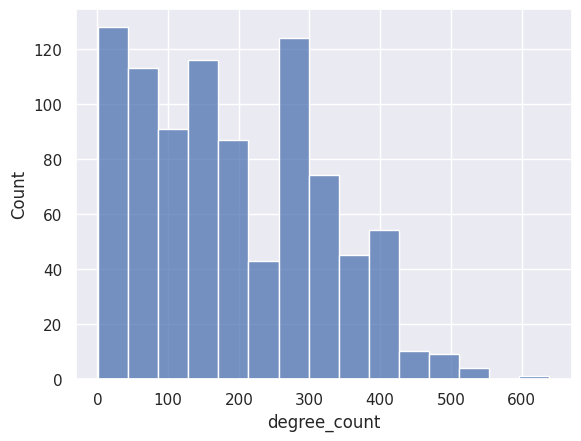

In [25]:
sns.histplot(data['degree_count'])

#### Dropping the outliers (colabs > 1000)

As we can see above there collaborators who are much higher than the collaborations, and much of them are bot's accounts (e.g *houndci* and *nrel-bot*). For this, we're removing them for the analysis.

In [26]:
# selRows = data[data['colabs'] > 1000].index
# data = data.drop(selRows,axis=0)

### Normalizing focus

After removing the outliers we need to normalize the focus metric to properly give insights about the data.

In [27]:
x = data['focus']
x_norm = (x-np.min(x))/(np.max(x)-np.min(x)) + 1e-10 #For log issues in the next cells
data['focus'] = x_norm

In [28]:
data['degree'].describe().to_frame()

,degree
count,899.000000
mean,0.215399
std,0.142932
min,0.001114
25%,0.090200
50%,0.192650
75%,0.324053
max,0.711581


In [29]:
data['focus'].describe().to_frame()

,focus
count,8.990000e+02
mean,1.141142e-01
std,7.829804e-02
min,1.000000e-10
25%,9.090909e-02
50%,9.090909e-02
75%,9.090909e-02
max,1.000000e+00


### Regression 

<AxesSubplot: xlabel='focus', ylabel='Count'>

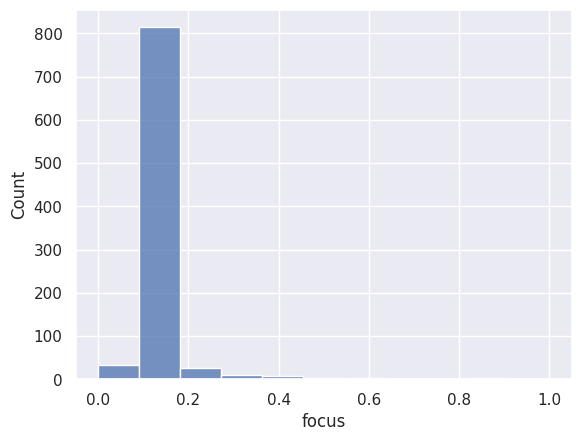

In [30]:
sns.histplot(data['focus'])

<AxesSubplot: xlabel='degree', ylabel='Count'>

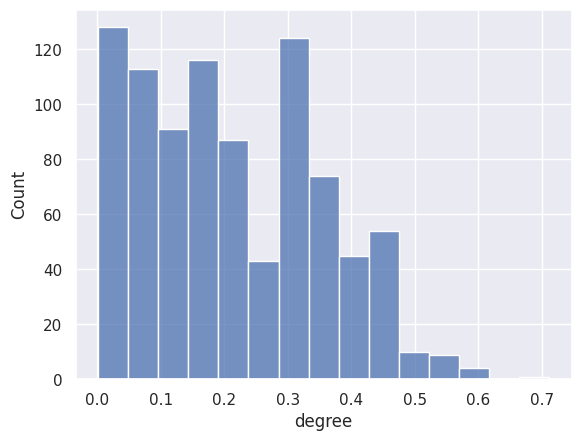

In [31]:
sns.histplot(data['degree'])

In [32]:
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

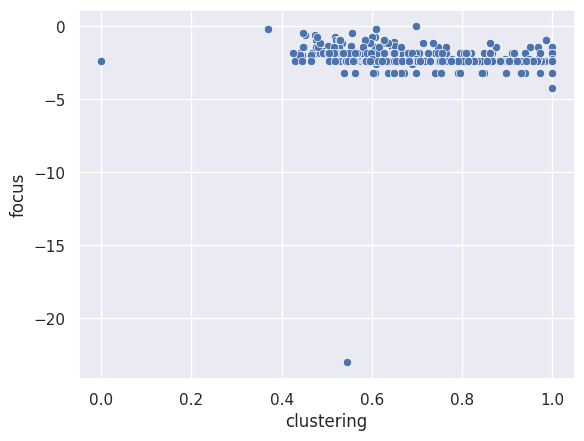

In [33]:
sns.scatterplot(x=data['clustering'], y=np.log(data['focus']));

In [34]:
data.sort_values(by="focus",ascending=False)

,focus,clustering,degree,degree_count
id,,,,
Apostolate,1.000000e+00,0.697432,0.414254,372
andrewsmith1986,8.674242e-01,0.609004,0.472160,424
WarPhalange,8.484848e-01,0.368704,0.711581,639
Ragnalypse,6.212121e-01,0.556865,0.344098,309
arrowstotheknee,6.212121e-01,0.446429,0.250557,225
...,...,...,...,...
mweathr,4.040404e-02,1.000000,0.103563,93
codepoet,4.040404e-02,0.740000,0.027840,25
arrowtootheknee,4.040404e-02,0.537198,0.051225,46


### Residuals

In [35]:
result = reg.linear(data=data, formula='focus ~ clustering')

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  focus   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     60.66
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.87e-14
Time:                        14:42:02   Log-Likelihood:                 1044.3
No. Observations:                 899   AIC:                            -2085.
Df Residuals:                     897   BIC:                            -2075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.011     17.981      0.000       0.176       0.219
clustering    -0.1064      0.014     -7.789      0.000      -0.133      -0.080
==============================================================================
Omnibus:                      998.857   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74746.807
Skew:                           5.388   Prob(JB):                         0.00
Kurtosis:                      46.351   Cond. No.                         8.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result.micro_summary()

variable,coefficient,std error,p-value
clustering,-0.106426,0.013664,0.000000


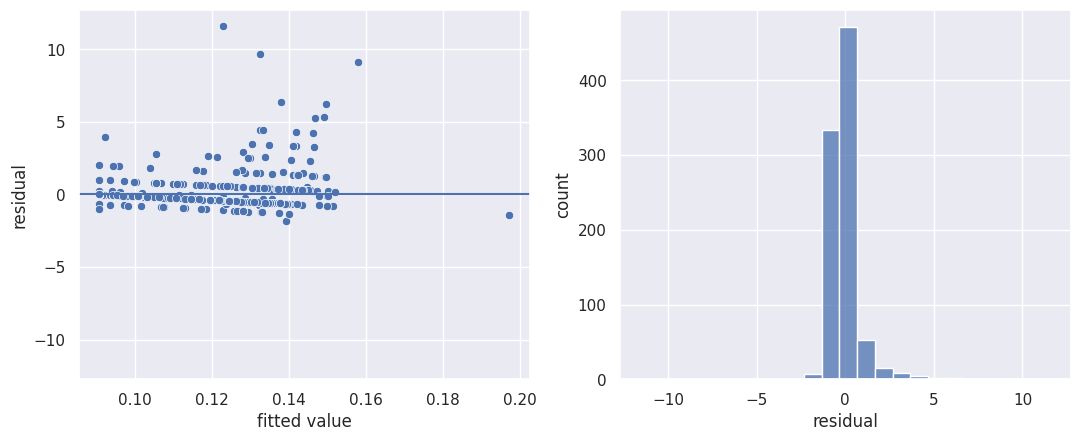

In [38]:
result.plot_residuals()

#### "Massaging" the data

As we can see, the distribution of residuals is not good as we want, because the residuals has not a randomic and normal distribution to give the give the necessary confidence to the model. 

Because of this, we can apply a logaritmic scale to the focus to get a better shape and use the degree as control variable (which means the quantity of neighbors of the vertex).

In [49]:
result = reg.linear(data=data, formula='np.log(focus) ~ clustering + degree')

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(focus)   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.20
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.23e-07
Time:                        14:45:55   Log-Likelihood:                -1057.1
No. Observations:                 899   AIC:                             2120.
Df Residuals:                     896   BIC:                             2135.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2853      0.130    -17.545      0.000      -2.541      -2.030
clustering    -0.2680      0.145     -1.853      0.064      -0.552       0.016
degree         0.9158      0.187      4.886      0.000       0.548       1.284
==============================================================================
Omnibus:                     2054.491   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10484237.246
Skew:                         -20.034   Prob(JB):                         0.00
Kurtosis:                     530.527   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
result.micro_summary()

variable,coefficient,std error,p-value
clustering,-0.267998,0.144663,0.064272
degree,0.915775,0.187410,0.000001


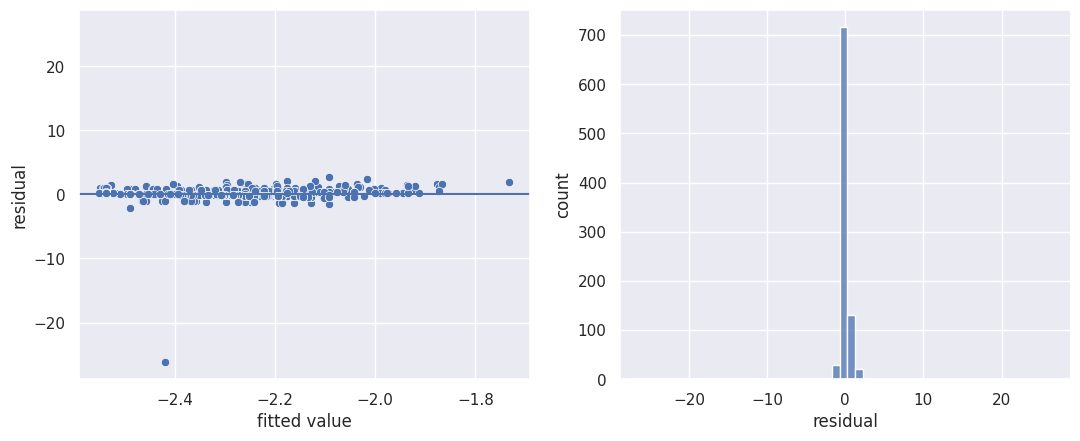

In [52]:
result.plot_residuals()

## Saving the graph

In [43]:
import netpixi

In [44]:
gt_save(g, 'colabs_reddit.net.gz')